In [484]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension("tabulator")

import hvplot.pandas
import seaborn as sns

In [485]:
df = pd.read_csv("survey.csv")

In [486]:
# print(df.head())

## (0) Data Cleaning

In [487]:
# Drop BPM column and all NaN values
df.drop(columns=["BPM"], inplace=True)
df = df.dropna()
# DF now includes a total of 718 rows

In [488]:
# Change Age, Anxiety, Depression, Insomnia, and OCD columns to int from float
df["Age"] = df["Age"].astype("int")
df["Anxiety"] = df["Anxiety"].astype("int")
df["Depression"] = df["Depression"].astype("int")
df["Insomnia"] = df["Insomnia"].astype("int")
df["OCD"] = df["OCD"].astype("int")

In [489]:
# Create Mental Health Dataframe
mh_df = df[["Anxiety", "Depression", "Insomnia", "OCD"]].copy()

In [490]:
# Create Total Health Score Column
df["Total Health Score"] = df["Anxiety"] + df["Depression"] + df["Insomnia"] + df["OCD"]

In [491]:
# Make DataFrame Pipeline Interactive
idf = df.interactive()

In [492]:
# Make MH Ratings Numerical
# df2=df.replace(to_replace="Never",value=0)
# df3=df2.replace(to_replace="Rarely",value=1)
# df4=df3.replace(to_replace="Sometimes",value=2)
# df5=df4.replace(to_replace="Very frequently",value=3)
# print(df5.head())

## (1) Understanding the Audience

Text(0, 0.5, 'Distribution')

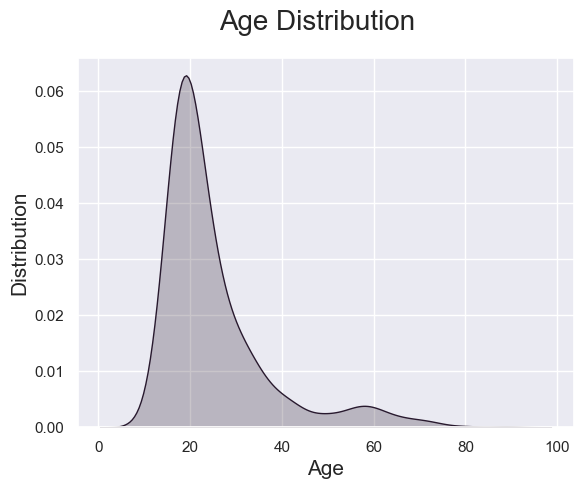

In [493]:
# Age Distribution
fig = sns.kdeplot(df["Age"], shade=True)
fig.figure.suptitle("Age Distribution", fontsize = 20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Distribution', fontsize=15)

Text(0, 0.5, 'Distribution')

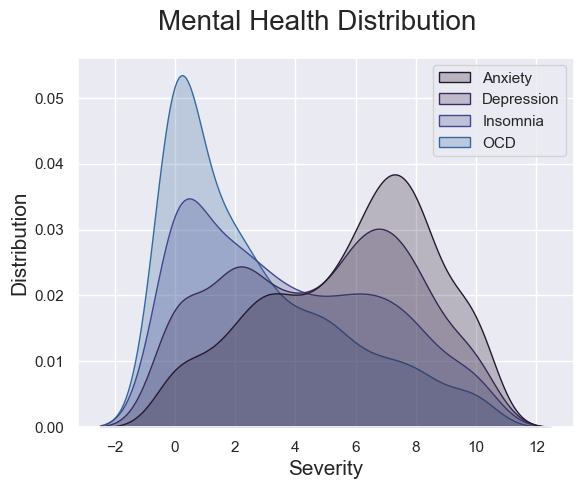

In [494]:
# Mental Health Distribution
fig = sns.kdeplot(data=mh_df, shade=True)
fig.figure.suptitle("Mental Health Distribution", fontsize = 20)
plt.xlabel('Severity', fontsize=15)
plt.ylabel('Distribution', fontsize=15)

Text(0, 0.5, 'Distribution')

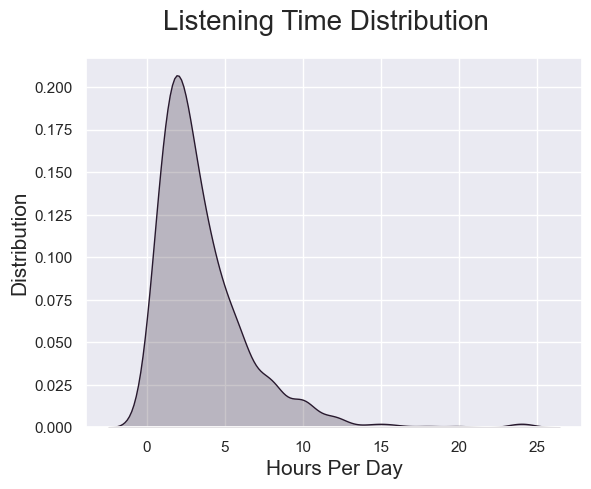

In [495]:
# Hours Per Day Distribution
fig= sns.kdeplot(df["Hours per day"], shade=True)
fig.figure.suptitle("Listening Time Distribution", fontsize = 20)
plt.xlabel('Hours Per Day', fontsize=15)
plt.ylabel('Distribution', fontsize=15)

Text(0, 0.5, 'Distribution')

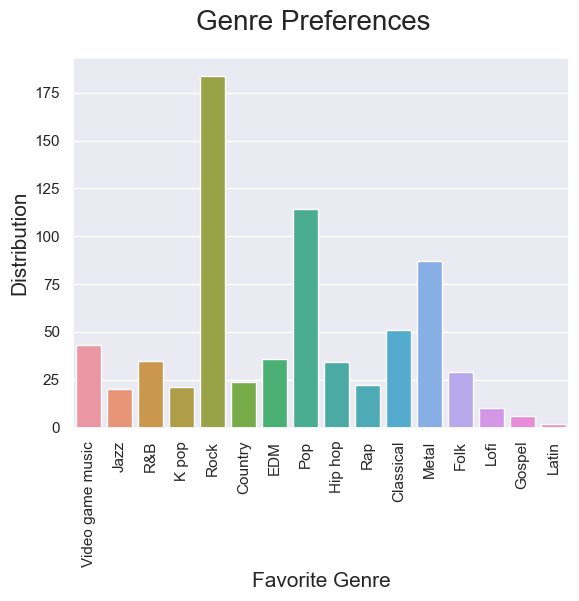

In [496]:
# Genre Breakdown by Count
fig = sns.countplot(x=df['Fav genre'])
plt.xticks(rotation=90)
fig.figure.suptitle("Genre Preferences", fontsize = 20)
plt.xlabel('Favorite Genre', fontsize=15)
plt.ylabel('Distribution', fontsize=15)

Text(0, 0.5, 'Age')

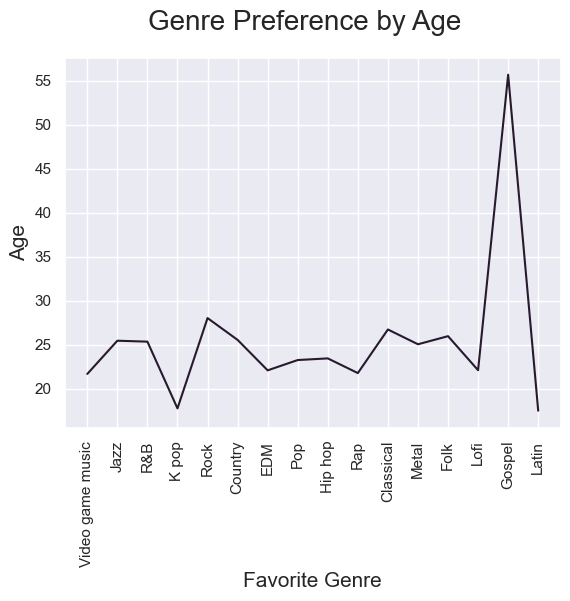

In [497]:
# Genre Breakdown by Age
fig = sns.lineplot(x=df['Fav genre'], y=df['Age'], ci=None)
plt.xticks(rotation=90)
fig.figure.suptitle("Genre Preference by Age", fontsize = 20)
plt.xlabel('Favorite Genre', fontsize=15)
plt.ylabel('Age', fontsize=15)

## (2) Data Analysis

Text(0, 0.5, 'Count')

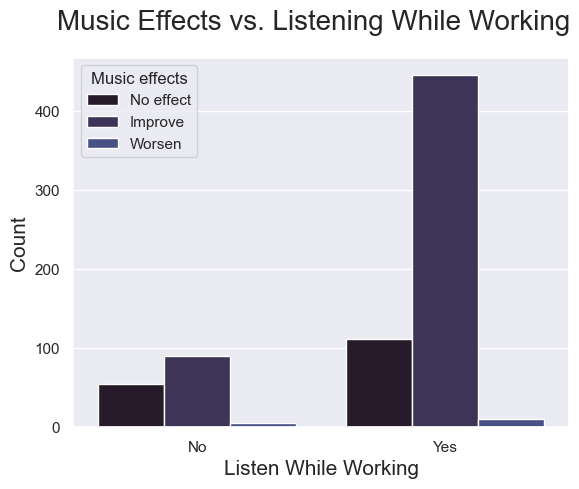

In [498]:
# Music Effects vs. Listening to Music While Working
fig = sns.countplot(x=df['While working'], hue=df["Music effects"])
fig.figure.suptitle("Music Effects vs. Listening While Working", fontsize = 20)
plt.xlabel('Listen While Working', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0, 0.5, 'Count')

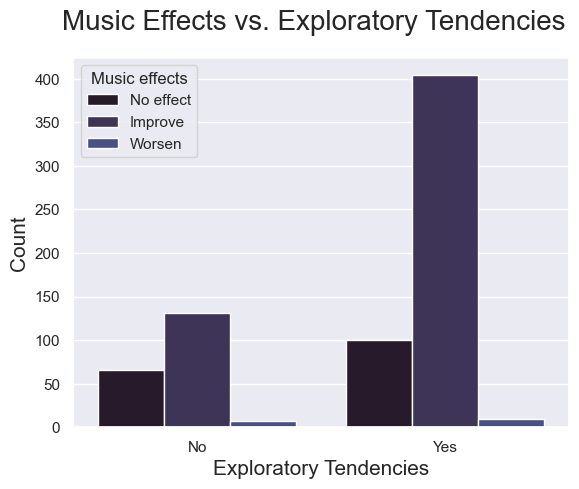

In [499]:
# Music Effects vs. Exploratory Tendencies
fig = sns.countplot(x=df['Exploratory'], hue=df["Music effects"])
fig.figure.suptitle("Music Effects vs. Exploratory Tendencies", fontsize = 20)
plt.xlabel('Exploratory Tendencies', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0, 0.5, 'Count')

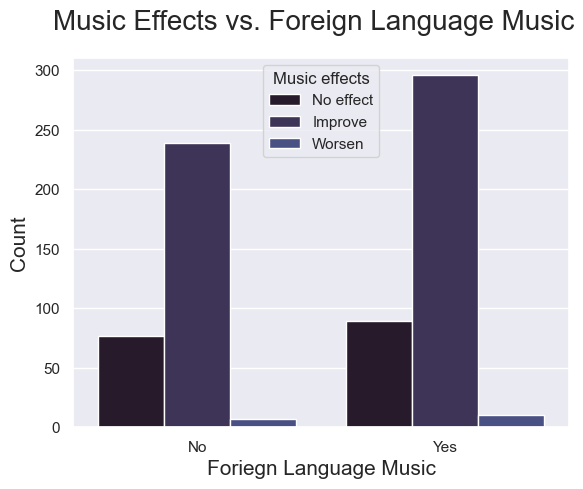

In [500]:
# Music Effects vs. Foreign Language Music
fig = sns.countplot(x=df['Foreign languages'], hue=df["Music effects"], order=("No", "Yes"))
fig.figure.suptitle("Music Effects vs. Foreign Language Music", fontsize = 20)
plt.xlabel('Foriegn Language Music', fontsize=15)
plt.ylabel('Count', fontsize=15)

### Widgets

In [501]:
# Float slider for hours per day listening to music
# hours_per_day_slider = pn.widgets.FloatSlider(name="Hours per day", 
#                                             start=0, 
#                                             end=24, 
#                                             step=0.5
#                                            )
# hours_per_day_slider

In [502]:
# Radio buttons for mental health conditions
# yaxis_mental_health = pn.widgets.RadioButtonGroup(
#     name="Y axis",
#     options=["Anxiety", "Depression", "Insomnia", "OCD"],
#     button_type="success"
# )
# yaxis_mental_health

In [503]:
# Dropdown menu for frequency by genre
# select = pn.widgets.Select(name='Listening Frequency by Genre', 
#                            options=['Classical', 'Country', 'EDM', "Folk", "Gospel", "Hip hop", "Jazz", "K pop", "Latin", "Lofi", "Metal", "Pop", "R&B", "Rap", "Rock", "Video game music"]
#                           )
# select

### Mental Health Rating by Genre Preference Bar Chart

In [504]:
# Mental Health Rating by Genre Pipeline
# genres = ['Classical', 'Country', 'EDM', "Folk", "Gospel", "Hip hop", "Jazz", "K pop", "Latin", "Lofi", "Metal", "Pop", "R&B", "Rap", "Rock", "Video game music"]

# genre_mh_bar_pipeline = (
#     idf[
#         (idf["Fav genre"].isin(genres))
#     ]
#     .groupby("Fav genre")[yaxis_mental_health].mean()
#     .to_frame()
#     .reset_index()
#     .reset_index(drop=True)
# )

In [505]:
# Plotting Mental Health Rating by Genre Bar Chart
# genre_mh_bar_plot = genre_mh_bar_pipeline.hvplot(kind="bar",
                                                #  x="Fav genre",
                                                #  y=yaxis_mental_health,
                                                #  title="Mental Health Rating by Genre Preference"
                                                # )
# genre_mh_bar_plot

### Mental Health Rating vs. Hours Per Day Listening to Music

In [506]:
# # Mental Health Rating vs. Hours Per Day Listening to Music Pipeline
# time_mh_rating_pipeline = (
#     idf[
#         (idf["Hours per day"] <= hours_per_day_slider)
#     ]
#     .groupby("Hours per day")[yaxis_mental_health].mean()
#     .to_frame()
#     .reset_index()
#     .sort_values(by='Hours per day')  
#     .reset_index(drop=True)
# )

In [507]:
# # Mental Health Rating vs. Hours Per Day Listening to Music Plot
# time_mh_rating_plot = time_mh_rating_pipeline.hvplot(x="Hours per day",
#                                                      y=yaxis_mental_health,
#                                                      line_width=2,
#                                                      title="Mental Health Rating vs. Hours Per Day Listening to Music"
#                                                     )
# # time_mh_rating_plot